In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


In [2]:
df= pd.read_csv("E:\Data Science Internship\Bharat Intern\Stock Prediction/netflix.csv")
closed_prices = df["Close"]

In [3]:
seq_len = 15

In [4]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [5]:
X=[]
Y=[]


In [6]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [7]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]


In [8]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [9]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])
    

In [10]:
model = Model(1,64)


In [11]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [12]:
loss_fn = nn.MSELoss()

In [13]:
num_epochs=100

In [14]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())



10 epoch loss 0.005213267
20 epoch loss 0.0054140114
30 epoch loss 0.0049155746
40 epoch loss 0.0043329806
50 epoch loss 0.0040512145
60 epoch loss 0.003617469
70 epoch loss 0.0031192428
80 epoch loss 0.002376412
90 epoch loss 0.0010375739


In [15]:
model.eval()

with torch.no_grad():
    output=model(test_x)



In [16]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

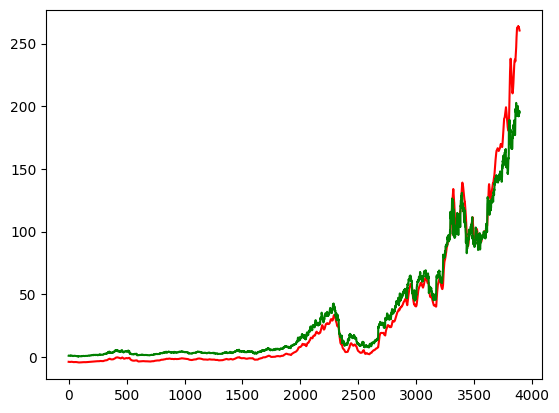

In [17]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()

